In [1]:
import pandas as pd
import numpy as np
# import os, sys
# from PIL import Image
from matplotlib import pyplot as plt
import pickle

## Build CNN Model

In [2]:
files_path = ""
sub_folder_path = "../data"

In [3]:
X_train = np.load(files_path + sub_folder_path + "/X_train.npy")
y_train = np.load(files_path + sub_folder_path + "/y_train.npy")

In [4]:
X_train.shape, y_train.shape

((300, 384, 384, 3), (300,))

In [5]:
categories = ['veg', 'beef', 'cheese', 'bread', 'dessert']

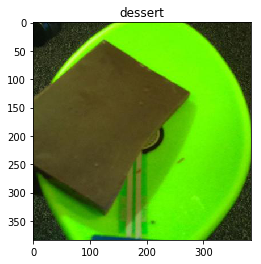

In [6]:
idx = 299
image_num = plt.imshow(X_train[idx])
plt.title(categories[y_train[idx]]);

## Shuffle the data

In [7]:
# Ensure that both X and y are shuffled in the same way
np.random.seed(seed=8)
np.random.shuffle(X_train)
np.random.seed(seed=8)
np.random.shuffle(y_train)

In [8]:
np.unique(y_train)

array([0, 1, 2, 3, 4], dtype=int8)

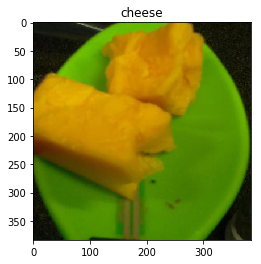

In [9]:
image_num = plt.imshow(X_train[idx])
plt.title(categories[y_train[idx]]);

## Define fn to create Xception transfer learning model

In [10]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Activation, Dropout, Flatten
from tensorflow.python.keras.layers import Conv2D
from tensorflow.python.keras.layers import MaxPooling2D, GlobalAveragePooling2D, BatchNormalization
from tensorflow.python.keras.applications import VGG16, Xception
from tensorflow.python.keras import regularizers

def get_vgg16_transfer_learning_model(input_shape, num_classes, l2=0.0017):
    model = Sequential([
        VGG16(weights='imagenet', include_top=False, input_shape=input_shape),
        Flatten(),
        Dense(64, activation='relu', kernel_regularizer=regularizers.l2(l2)),
#         Dense(64, activation='relu'),        
        Dense(num_classes, activation='softmax')
#         Conv2D(filters=num_classes, kernel_size=3, activation='relu', padding='same'),
#         GlobalAveragePooling2D(),
#         Activation('softmax')
    ])
    
    return model

def get_xception_transfer_learning_model(input_shape, num_classes, l2=0.001):
    model = Sequential([
        Xception(weights='imagenet', include_top=False, input_shape=input_shape),
        Flatten(),
        Dense(64, activation='relu', kernel_regularizer=regularizers.l2(l2)),
        BatchNormalization(),
        Dropout(0.5),                
        Dense(num_classes, activation='softmax')        
#         Conv2D(filters=num_classes, kernel_size=3, activation='relu', padding='same'),        
#         Dropout(0.5),        
#         GlobalAveragePooling2D(),
#         Activation('softmax')
    ])
    
    return model

## Build model

In [11]:
input_shape = X_train.shape[1:]
num_classes = np.unique(y_train).shape[0]

In [12]:
# model = get_vgg16_transfer_learning_model(input_shape, num_classes, l2=0)
# model = get_vgg16_transfer_learning_model(input_shape, num_classes)
model = get_xception_transfer_learning_model(input_shape, num_classes)
model.summary()
# import h5py
num_gpus = 1

if num_gpus > 1:
    model = multi_gpu_model(model, gpus=num_gpus)

model.compile(optimizer="adam",
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
xception (Model)             (None, 12, 12, 2048)      20861480  
_________________________________________________________________
flatten_1 (Flatten)          (None, 294912)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                18874432  
_________________________________________________________________
batch_normalization_5 (Batch (None, 64)                256       
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 325       
Total params: 39,736,493
Trainable params: 39,681,837
Non-trainable params: 54,656
___________________________________________________________

## Train model

In [13]:
train_history = model.fit(X_train, y_train, epochs=10, batch_size=16, validation_split=0.2, verbose=1)

Train on 240 samples, validate on 60 samples
Epoch 1/10
240/240 [==============================] - 59s 244ms/step - loss: 1.0053 - acc: 0.7625 - val_loss: 5.7450 - val_acc: 0.3500
Epoch 2/10
240/240 [==============================] - 31s 130ms/step - loss: 0.6897 - acc: 0.9792 - val_loss: 3.7212 - val_acc: 0.6500
Epoch 3/10
240/240 [==============================] - 31s 131ms/step - loss: 0.7080 - acc: 0.9917 - val_loss: 1.2734 - val_acc: 0.8833
Epoch 4/10
240/240 [==============================] - 31s 131ms/step - loss: 0.6784 - acc: 0.9917 - val_loss: 0.7817 - val_acc: 0.9167
Epoch 5/10
240/240 [==============================] - 31s 131ms/step - loss: 0.6160 - acc: 0.9958 - val_loss: 0.5797 - val_acc: 1.0000
Epoch 6/10
240/240 [==============================] - 31s 130ms/step - loss: 0.5798 - acc: 0.9958 - val_loss: 0.5296 - val_acc: 1.0000
Epoch 7/10
240/240 [==============================] - 31s 131ms/step - loss: 0.5953 - acc: 0.9708 - val_loss: 0.5220 - val_acc: 1.0000
Epoch 8/10

## Save model

In [14]:
from tensorflow.python.keras.models import load_model
# import h5py

# creates a HDF5 file
model.save('ss_img_reg_model.h5')

# returns a compiled model
# identical to the previous one
model = load_model('ss_img_reg_model.h5')

## Shuffle the data

In [15]:
# Shuffle the data
np.random.seed(seed=5)
np.random.shuffle(X_train)
np.random.seed(seed=5)
np.random.shuffle(y_train)

## Further train model

In [16]:
train_history1 = model.fit(X_train, y_train, epochs=5, batch_size=16, validation_split=0.2, verbose=1)

Train on 240 samples, validate on 60 samples
Epoch 1/5
240/240 [==============================] - 39s 163ms/step - loss: 0.4680 - acc: 0.9875 - val_loss: 0.4219 - val_acc: 1.0000
Epoch 2/5
240/240 [==============================] - 31s 129ms/step - loss: 0.4314 - acc: 1.0000 - val_loss: 0.4041 - val_acc: 1.0000
Epoch 3/5
240/240 [==============================] - 31s 130ms/step - loss: 0.4075 - acc: 0.9958 - val_loss: 0.3821 - val_acc: 1.0000
Epoch 4/5
240/240 [==============================] - 31s 129ms/step - loss: 0.3804 - acc: 1.0000 - val_loss: 0.3565 - val_acc: 1.0000
Epoch 5/5
240/240 [==============================] - 31s 129ms/step - loss: 0.3591 - acc: 1.0000 - val_loss: 0.3366 - val_acc: 1.0000


In [17]:
from tensorflow.python.keras.models import load_model
# import h5py

# creates a HDF5 file
model.save('ss_img_reg_model_final.h5')

# returns a compiled model
# identical to the previous one
# model1 = load_model('ss_img_reg_model1.h5')

In [18]:
hist0 = pd.DataFrame(train_history.history)
hist1 = pd.DataFrame(train_history1.history)

all_hist = [hist0, hist1]

all_hist_df = pd.concat(all_hist)

In [19]:
all_hist_df.index = np.arange(1, all_hist_df.shape[0]+1)

In [20]:
all_hist_df.to_csv("./cnn_hist.csv")

## Visualize train-val loss & accuracy

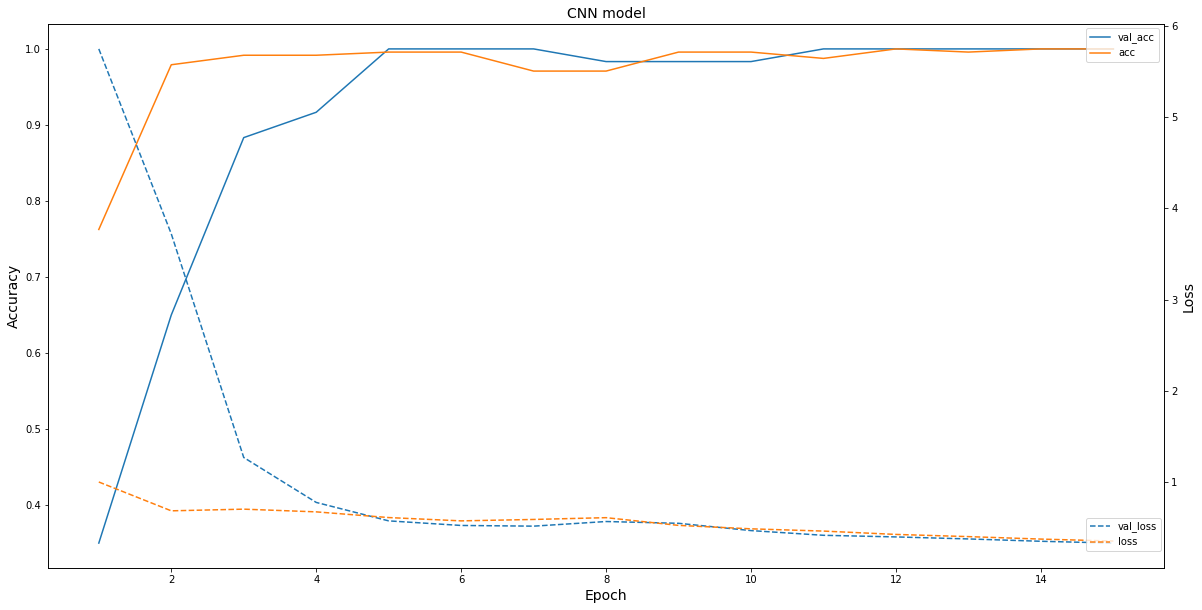

In [21]:
# current_history = pd.DataFrame(history_norm.history)
current_history = all_hist_df

plt.figure(figsize=(20, 10))
ax1 = plt.gca()
ax1.plot(current_history.val_acc, label='val_acc')
ax1.plot(current_history.acc, label='acc')
ax2 = plt.twinx()
ax2.plot(current_history.val_loss, linestyle='--', label='val_loss')
ax2.plot(current_history.loss, linestyle='--', label='loss')
ax1.legend(loc=(0.93, 0.93), frameon=True)
ax2.legend(loc = (0.93, 0.03))
ax1.set_title("CNN model", fontsize=14)
ax1.set_ylabel("Accuracy", fontsize=14)
ax2.set_ylabel("Loss", fontsize=14)
ax1.set_xlabel("Epoch", fontsize=14);

## Evaluate model on test set

In [30]:
# # sub_folder_path = "data/Food-11_2/evaluation"
# files_path = ""
# sub_folder_path = "data"

In [31]:
# X_test = np.load(files_path + sub_folder_path + "/X_test.npy")
# y_test = np.load(files_path + sub_folder_path + "/y_test.npy")

In [32]:
# model = load_model('ss_img_reg_model2.h5')

In [33]:
# scores = model.evaluate(X_test, y_test)
# print('Test loss:', scores[0])
# print('Test accuracy:', scores[1])

In [34]:
# model1 = load_model('ss_img_reg_model3.h5')

In [35]:
# scores = model1.evaluate(X_test, y_test)
# print('Test loss:', scores[0])
# print('Test accuracy:', scores[1])